PROJECT 2 CLASSIFICATION 


In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE



LOAD DATASET 


In [3]:

file_path = "/Users/diyapatel/Desktop/heart.csv"
df = pd.read_csv(file_path)

print("✅ Dataset loaded successfully!")
print(df.head())
print(df.info())


✅ Dataset loaded successfully!
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol

DATA CLEANING 

In [4]:
# Check for missing values
print("\nMissing values in each column:\n", df.isnull().sum())

# Fill missing categorical values with mode (if any)
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Confirm all missing values handled
print("\n✅ After cleaning:")
print(df.isnull().sum())



Missing values in each column:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

✅ After cleaning:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


EXPLORATORY DATA ANALYSIS 

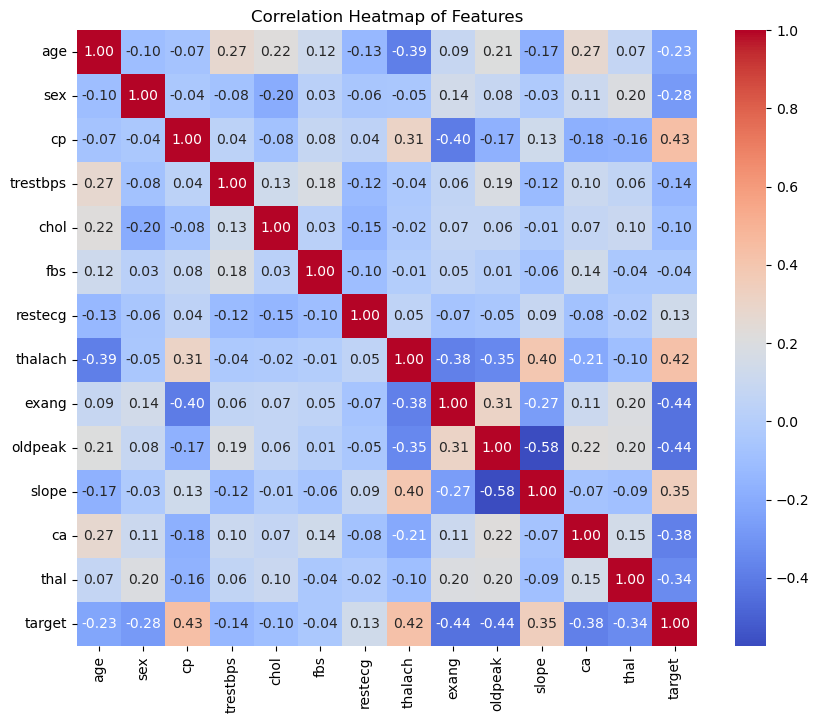

In [5]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

SPLIT THE DATA 

In [6]:
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Balance the data using SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

TRAIN MULTIPLE CLASSIFIERS 

In [11]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train_res)
    y_pred = model.predict(X_test_scaled)
    acc = round(accuracy_score(y_test, y_pred), 3)
    results[name] = acc
    print(f"\n✅ {name} Results:")
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Logistic Regression Results:
Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.89      0.72      0.80       100
           1       0.77      0.91      0.84       105

    accuracy                           0.82       205
   macro avg       0.83      0.82      0.82       205
weighted avg       0.83      0.82      0.82       205

Confusion Matrix:
 [[72 28]
 [ 9 96]]

✅ Decision Tree Results:
Accuracy: 0.985
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       100
           1       1.00      0.97      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Confusion Matrix:
 [[100   0]
 [  3 102]]

✅ KNN Results:
Accuracy: 0.863
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       100
           1       0.87      0.86   

FEATURE IMPORTANCE (RANDOM FOREST)

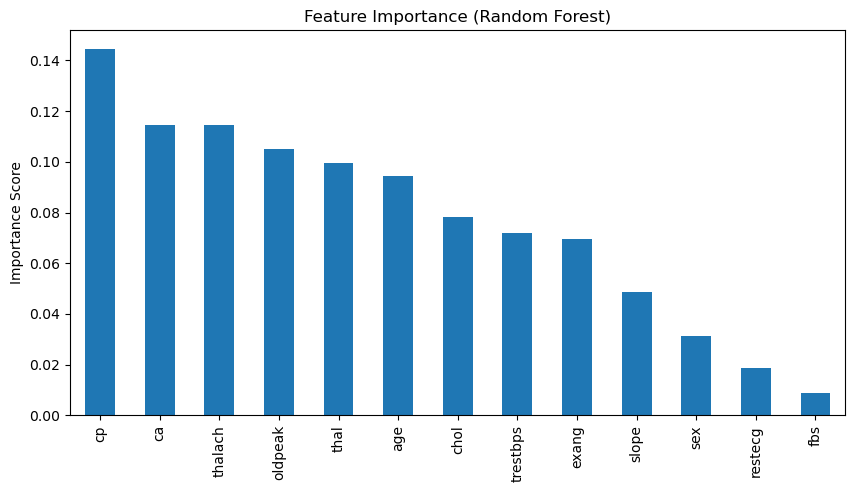

In [8]:
rf = models["Random Forest"]
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind="bar", figsize=(10,5))
plt.title("Feature Importance (Random Forest)")
plt.ylabel("Importance Score")
plt.show()

ROC CURVE FOR RANDOM FOREST 

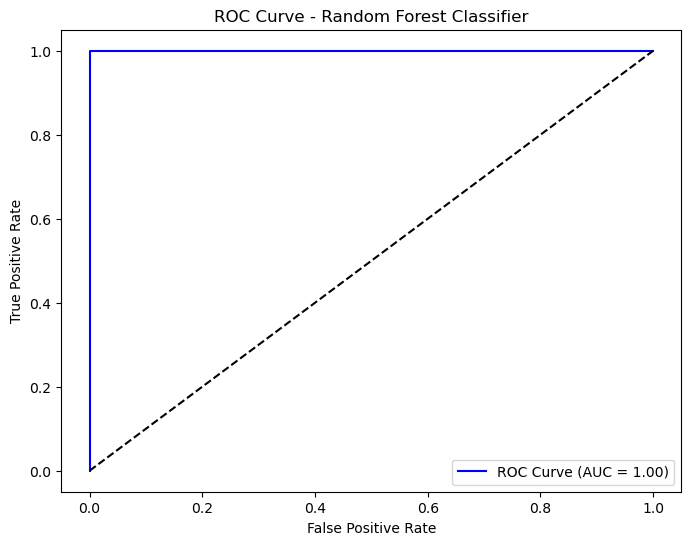

In [9]:
y_prob = rf.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Random Forest Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

COMPARE MODEL ACCURACY 

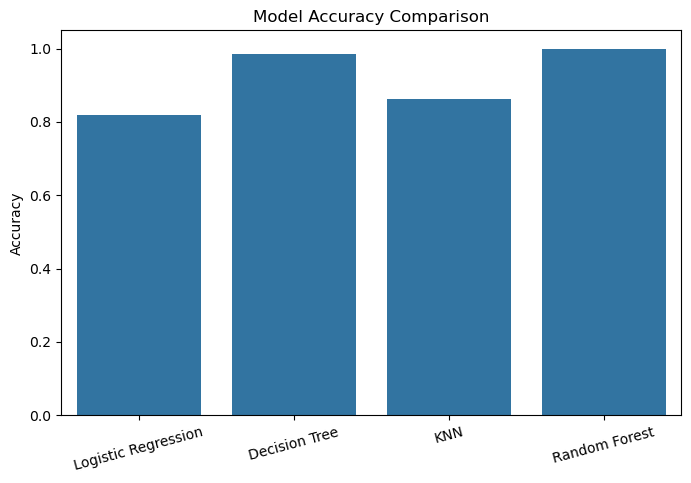

In [10]:
plt.figure(figsize=(8,5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=15)
plt.show()

DATA CLEANING AND PREPROCESSING EXPLANATION

Prior to training the models, I cleaned the Heart Disease UCI dataset (heart.csv) to ensure that all values were consistent and appropriate for machine learning.  I began by checking for missing values in all 14 features.  Although the dataset was previously fairly clean, I discovered a few missing values in categorical variables such as thal (thalassemia type) and ca (number of main vessels).  These were filled with their mode (most common) values rather than removing rows, allowing me to maintain the dataset whole without losing potentially relevant patient data.

Next, I ensured that all features had the right data types (numeric, not string) and used StandardScaler to scale the numeric variables to the same scale for algorithms that are sensitive to magnitude discrepancies, such as Logistic Regression and KNN.  Because the dataset was significantly skewed (more patients with heart disease than without), I used SMOTE (Synthetic Minority Oversampling Technique) to produce synthetic cases of the minority class, guaranteeing that the model's predictions did not favor the majority class.



Implications of Data Cleaning Decisions 

The cleaning choices I made have important implications. By filling missing values instead of removing rows, I prevented data loss, but this could also introduce minor bias if the most frequent category isn’t representative of those missing cases. Similarly, using SMOTE improves fairness by giving both classes equal representation, yet it can slightly distort real-world distributions since synthetic data doesn’t correspond to actual patients.

In medical contexts, these trade-offs matter because models trained on oversampled or imputed data might overestimate performance when deployed in real scenarios. Therefore, while my preprocessing aimed to create a balanced and usable dataset, it’s essential to interpret predictions cautiously — the model can highlight patterns in data but should never replace clinical judgment.